Initial settings:
mm1x = -3.9
mm1y = -2.7
mm2x = -4.5
mm2y = -4.3

In Nov. 2018 we put a bump on the beam and calculated that the smallest centered aperture we could achieve was 3mmx3mm, corresponding to:
mm1_x = -4.60
mm2_x = -4.94
mm1_y = -3.21
mm2_y = -5.14

This means that right now, our FE aperture is not centered.

Start by going back to that 3mm aperture, then re-measure the undulator spectra at EPU gap 30/phase 0.
Use BDA 2mm, measure on the diode. Go 21..27 step 0.05 (entry174)

Peak is at 24.57, whereas I had previously measured it at 24.2

This is in a_slit1_hz_for_focus.h5

Then sweep backwards with 20/20 BDA (entry175)

Then sweep mm1x over limits (-5.5 to 5.31, other blades at 3mm position). This is entry 177. Get a step, with knee at -4.2 (starts to cut sharply at lower values). Using hv=24.54, BDA 20/20

mm2x same range (178)
mm1y (179) (hits limit switch and glitches motorscangui - stay to min -5.15)
mm2y (180) (as above)

Since the shapes are all the same, maybe by looking at the relative offset in knees you can correlate to the known 3x3 aperture positions.

Mono baffle scan at small aperture: (1.2/1.2)
Initially hoffset -0.2, voffset -0.8
Reoptimize M1 pitch, then:
hoffset scan (182) --> -0.2 is about right
voffset scan (183) --> -0.4 seems more appropriate (!!!!!!!)

(--> Compare physical beam profile at mono baffles with Spectra calculation)

Change voffset to -0.4, retake small aperture undulator spectra to match 174
(entry 184) --> Identical

M3 baffles currently set to hoff -0.2 (gap 50), voff -0.3 (gap 18.4). M3 bpm 29.
Sweep gaps to find gap offsets
hgap: 185 with 0.5 steps
eh, finish this later.


18mm wiggler scan - very low intensity. Not right.
(entry193)

In [1]:
from BLOCH_beamline import *
data_folder = Path('Data/')
%matplotlib inline
font = {'size'   : 14}
matplotlib.rc('font', **font)

---- BLOCH beamline ----
	Last updated 02.13.2018 

	Latest change: Simple resolution calculators



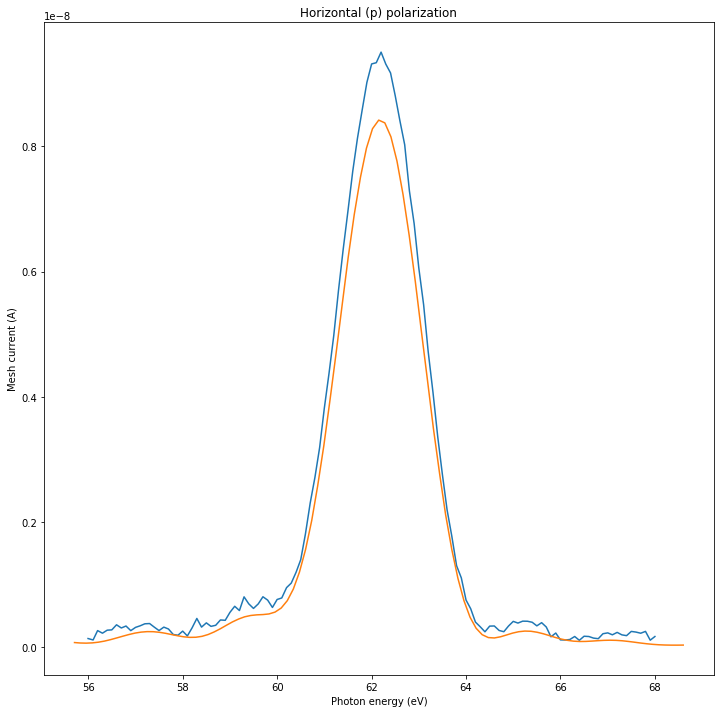

In [12]:
%matplotlib inline
fig=plt.figure(figsize=(12,12))

hpol = HDF5loadscan(data_folder/"a_slit1_hz_for_focus.h5",157)
hpol['meshCurrent'] = [((ii)/1000)+3.7e-8 for ii in hpol['b110a_ctl_em02_ch01']]
old_hpol = HDF5loadscan(data_folder/"(2019.02.28)_HPOL_gaps2.h5",860)
old_hpol['meshCurrent'] = [((ii)/1000) for ii in old_hpol['b110a_ctl_em02_ch01']]

plt.subplot(111)
plt.plot(hpol['mono_energy'],hpol['meshCurrent'])
plt.plot(old_hpol['mono_energy'],old_hpol['meshCurrent'])
plotmax=np.array(hpol['meshCurrent']).max()
plotmin=np.array(hpol['meshCurrent']).min()
plt.title("Horizontal (p) polarization")
plt.xlabel("Photon energy (eV)")
plt.ylabel("Mesh current (A)")
plt.show()




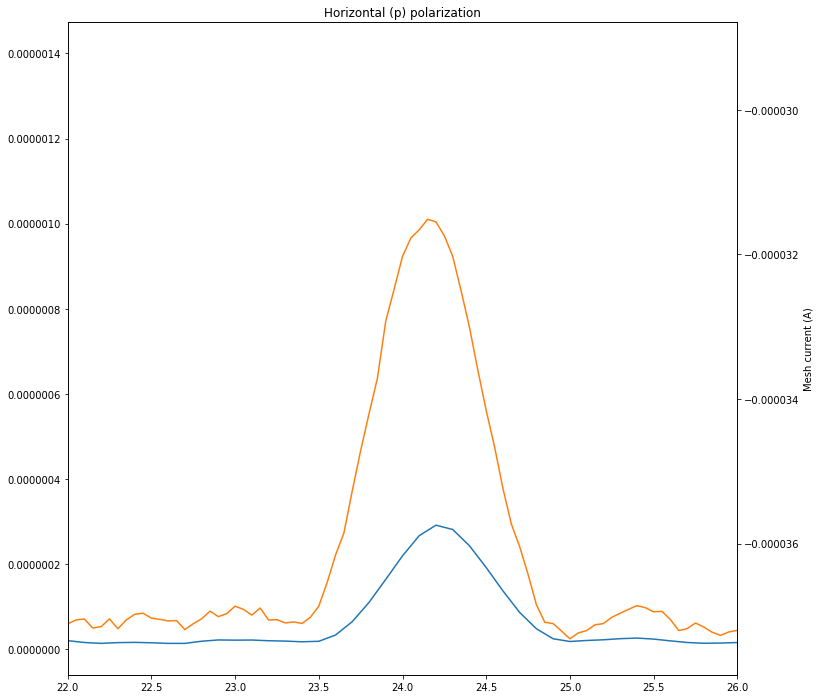

In [29]:
%matplotlib inline
fig=plt.figure(figsize=(12,12))

vpol = HDF5loadscan(data_folder/"a_slit1_hz_for_focus.h5",172)
vpol['meshCurrent'] = [(-(ii)/1000) for ii in vpol['b110a_ctl_em02_ch03']]

old_vpol = HDF5loadscan(data_folder/"19.01.21.higherOrder_tests.h5",100)
old_vpol['meshCurrent'] = [((ii)/1) for ii in old_vpol['b110a_ctl_em02_ch01']]

plt.subplot(111)
plt.plot(vpol['mono_energy'],vpol['meshCurrent'])
ax2 = plt.gca().twinx()
ax2.plot(old_vpol['mono_energy'],old_vpol['meshCurrent'],color='tab:orange')
plotmax=np.array(hpol['meshCurrent']).max()
plotmin=np.array(hpol['meshCurrent']).min()
plt.title("Horizontal (p) polarization")
plt.xlabel("Photon energy (eV)")
plt.ylabel("Mesh current (A)")
plt.xlim([22,26])
plt.show()


